<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml08_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Stochastic Gradient Descent(SGD, 확률적 경사 하강법)

In [91]:
w = np.arange(-5, 5, 0.001)
cost = w**2  # 비용 함수

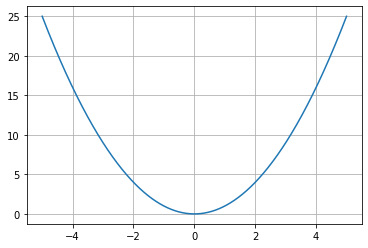

In [92]:
plt.plot(w, cost)

plt.grid()
plt.show()

In [93]:
w_init = -4

In [94]:
w_grad = 2 * w_init

In [95]:
learning_rate = 0.1

In [96]:
w_new = w_init - learning_rate * w_grad

In [97]:
w_new

-3.2

In [98]:
w_init = w_new
w_grad = 2 * w_init
w_new = w_init - learning_rate * w_grad
w_new

-2.56

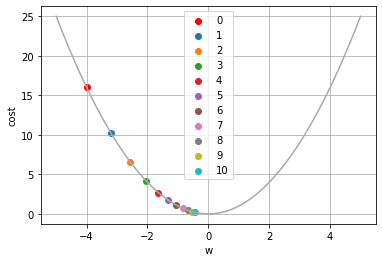

In [99]:
plt.plot(w, cost, color='darkgray')  # 비용 함수 시각화

w_init = -4  # 임의의 w 시작값
cost_init = w_init ** 2
plt.scatter(w_init, cost_init, color='red', label='0')

learning_rate = 0.1 # 학습률(0.2, 0.3, 0.5, 0.8, 1.0, 1.1 테스트)
for epoch in range(10):
    w_grad = 2 * w_init  # 임의의 w에서의 grdient를 계산
    w_new = w_init - learning_rate * w_grad  # 경사 하강법 알고리즘
    cost_new = w_new ** 2
    plt.scatter(w_new, cost_new, label=f'{epoch+1}')
    w_init = w_new

plt.legend()
plt.grid()
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

경사 하강법에서의 학습률(learning rate):

*   학습률이 작은 경우, 최솟값을 향해 천천히 움직임.
*   학습률이 큰 경우, 최솟값을 향해 빠르게 움직이거나 혹은 불안정하게 움직일 수 있음.
*   학습률이 너무 작으면, 최대 반복 횟수(max_iter) 안에서 최솟값으로 수렴(converge)하지 못함.
    * 학습률을 크게 하거나 최대 반복 횟수를 늘려주면 수렴하게 만들 수 있음.
*   학습률이 너무 크면, 최솟값으로 수렴하는 것이 아니라 발산(diverge)하는 경우가 발생할 수도 있음.
*   학습률은 머신 러닝 알고리즘의 성능을 향상시키기 위해서 튜닝하는 하이퍼파라미터 중 하나.
    *   머신 러닝 알고리즘들 중에서는 처음에는 학습률을 크게 하고, 에포크가 진행될 때마다 학습률을 점점 작게 줄이는 방식으로 조정하는 알고리즘도 있음.


# SGDClassifier

## Data

In [100]:
fish_df = pd.read_csv('https://bit.ly/fish_csv')

In [101]:
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [102]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


데이터 프레임에서 Species 특성을 target으로, 나머지 특성들을 데이터로 해서 분류.

In [103]:
X = fish_df.drop(columns='Species').to_numpy()  # data
y = fish_df['Species'].values  # target

In [104]:
X[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [105]:
y[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

## Train/Test split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [107]:
X_train.shape, y_train.shape

((119, 5), (119,))

In [108]:
X_test.shape, y_test.shape

((40, 5), (40,))

## 전처리 - 특성 스케일링

In [109]:
scaler = StandardScaler()

In [110]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
np.mean(X_train_scaled, axis=0)  # 훈련 셋의 모든 특성들의 평균 ~ 0

array([-1.81927302e-16, -1.52772286e-17, -3.93942582e-16, -7.29575130e-16,
        7.18846084e-16])

In [112]:
np.std(X_train_scaled, axis=0)  # 훈련 셋의 모든 특성들의 표준편차 ~ 1

array([1., 1., 1., 1., 1.])

## 모델 훈련(train)

In [113]:
sgd_clf = SGDClassifier(loss='log', random_state=42)  # 모델 생성

In [114]:
sgd_clf.fit(X_train_scaled, y_train)  # 모델 훈련

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [115]:
# 학습 셋의 성능
sgd_clf.score(X_train_scaled, y_train)

0.8319327731092437

In [116]:
sgd_clf.intercept_  # (7,): n_classes

array([-21.30540045, -43.1249902 ,  -3.3990157 , -30.38561783,
        -8.39222504, -62.17137674, -10.2687345 ])

In [117]:
sgd_clf.coef_  # (7, 5): n_classes, n_features

array([[ -6.30108425,  -0.59572877,   7.88184358,  28.50725844,
         -4.57524048],
       [-28.03749392, -13.01864322, -24.28354615,  37.56556064,
         -4.99368983],
       [ -3.25439388,  28.59201965, -45.12726245, -11.25240619,
         29.33632453],
       [  4.33466212,  15.13001677,  12.21938065, -24.53199057,
         -0.61293767],
       [-23.45929132, -24.10259789,  23.51603172,  -3.61712191,
         14.60754478],
       [  7.03785146,   6.44153908,   8.0385569 , -19.38693385,
        -24.29711606],
       [ -9.50657123,  -4.09669305,   1.36710436,  -0.56202204,
         11.60507989]])

## 모델 평가

In [118]:
# 테스트 셋의 성능(정확도) -> 일반화 성능
sgd_clf.score(X_test_scaled, y_test)

0.775

In [119]:
test_pred = sgd_clf.predict(X_test_scaled)  # 테스트 셋의 예측값

In [120]:
confusion_matrix(y_test, test_pred)

array([[11,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  1,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  2,  0,  0,  3,  0,  0],
       [ 0,  0,  2,  0,  1,  0,  0]])

# Online 학습 방법

*   epoch(에포크): 훈련 셋의 전체 샘플이 한번 학습(fitting)되는 것.
*   max_iter: epoch를 반복하는 최대 횟수.

In [121]:
sgd_clf = SGDClassifier(loss='log', random_state=42, max_iter=10)

In [122]:
sgd_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [123]:
sgd_clf.intercept_

array([-21.30540045, -43.1249902 , -14.51022923, -30.38561783,
       -17.12077511, -62.17137674, -25.16714949])

In [124]:
sgd_clf.coef_

array([[ -6.30108425,  -0.59572877,   7.88184358,  28.50725844,
         -4.57524048],
       [-28.03749392, -13.01864322, -24.28354615,  37.56556064,
         -4.99368983],
       [ -3.60592802,  17.34855902, -49.65498791, -26.99712078,
         47.58058864],
       [  4.33466212,  15.13001677,  12.21938065, -24.53199057,
         -0.61293767],
       [-47.59621038, -19.7141122 ,  21.76713845,   1.91422976,
         21.00699325],
       [  7.03785146,   6.44153908,   8.0385569 , -19.38693385,
        -24.29711606],
       [-19.43087985,  -7.13217691,  -2.58092476,   0.7050211 ,
         11.6470326 ]])

In [125]:
# 훈련 셋 성능(정확도)
sgd_clf.score(X_train_scaled, y_train)
#> max_iter=1000인 경우에 비해서 정확도가 많이 낮음.

0.773109243697479

SGD 알고리즘은 기존에 훈련된 상태에서 이어서 계속 훈련할 수 있는 기능이 있음.

In [126]:
sgd_clf.partial_fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [127]:
sgd_clf.score(X_train_scaled, y_train)
#> 처음 훈련(fit)했을 때 보다 부분 훈련(partial_fit)을 한 후 정확도가 더 좋아짐.

0.8151260504201681

## partial_fit train/test 성능 비교

In [128]:
target_names = np.unique(y_train)
target_names  #> fit을 호출하지 않은 상태에서 parital_fit을 호출할 때 필요.

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [129]:
sgd_clf = SGDClassifier(loss='log', random_state=42)
train_scores = []  # 각각의 partial_fit에서 평가한 훈련 셋의 점수(정확도)를 저장할 리스트
test_scores = []  # 각각의 partial_fit에서 평가한 테스트 셋의 점수(정확도)를 저장할 리스트

In [130]:
for _ in range(300):
    # online 학습
    sgd_clf.partial_fit(X_train_scaled, y_train, classes=target_names)
    # 훈련 셋 평가
    tr_sc = sgd_clf.score(X_train_scaled, y_train)
    train_scores.append(tr_sc)
    # 테스트 셋 평가
    te_sc = sgd_clf.score(X_test_scaled, y_test)
    test_scores.append(te_sc)

In [131]:
train_scores[:10]

[0.5294117647058824,
 0.6218487394957983,
 0.6386554621848739,
 0.7310924369747899,
 0.7226890756302521,
 0.7310924369747899,
 0.7647058823529411,
 0.7310924369747899,
 0.8151260504201681,
 0.7478991596638656]

In [132]:
test_scores[:10]

[0.65, 0.55, 0.575, 0.7, 0.7, 0.7, 0.725, 0.775, 0.825, 0.7]

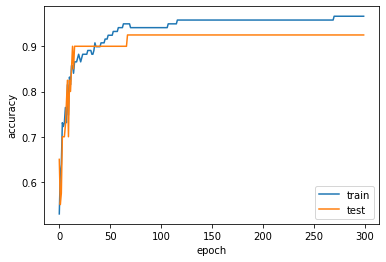

In [133]:
plt.plot(train_scores, label='train')
plt.plot(test_scores, label='test')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [134]:
# test score의 최댓값의 인덱스(위치)
np.argmax(test_scores)

67

In [135]:
test_scores[67]

0.925

In [136]:
# online 학습에서 찾은 max_iter 값으로 모델을 다시 훈련 -> 평가
sgd_clf = SGDClassifier(loss='log', max_iter=68, tol=None, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=68,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [137]:
sgd_clf.score(X_train_scaled, y_train)

0.8991596638655462

In [138]:
sgd_clf.score(X_test_scaled, y_test)

0.925